# An exhaustive example with an ODS steel

**Markus Kühbach** (Department of Physics, Humboldt-Universität zu Berlin)<br>
Jing Wang, Daniel Schreiber (both at their times with the Pacific Northwest National Laboratory)

## Get the toolbox ready
***

This section is much more simple now. Instead of appending system paths and directories, one can simply import and use.  

In [1]:
from jupyterlab_h5web import H5Web
import numpy as np
import os
from IPython.display import Image

ModuleNotFoundError: No module named 'jupyterlab_h5web'

In [2]:
from paraprobe_parmsetup.tools.transcoder_guru import ParmsetupTranscoder
from paraprobe_parmsetup.tools.ranger_guru import ParmsetupRanger
from paraprobe_parmsetup.tools.surfacer_guru import ParmsetupSurfacer
from paraprobe_parmsetup.tools.distancer_guru import ParmsetupDistancer
from paraprobe_parmsetup.tools.tessellator_guru import ParmsetupTessellator
from paraprobe_parmsetup.tools.spatstat_guru import ParmsetupSpatstat, SpatstatTask
from paraprobe_parmsetup.tools.nanochem_guru import ParmsetupNanochem, NanochemTask, Delocalization, InterfaceMeshing, CompositionAnalysis
from paraprobe_parmsetup.tools.utils.primscontinuum import RoiRotatedCuboid, RoiRotatedCylinder, RoiSphere

from paraprobe_transcoder.paraprobe_transcoder import ParaprobeTranscoder
from paraprobe_autoreporter.wizard.ranger_report import AutoReporterRanger
from paraprobe_autoreporter.wizard.distancer_report import AutoReporterDistancer
from paraprobe_autoreporter.wizard.tessellator_report import AutoReporterTessellator
from paraprobe_autoreporter.wizard.spatstat_report import AutoReporterSpatstat
from paraprobe_autoreporter.wizard.nanochem_report import AutoReporterNanochem

# 1. Pre-processing
***

### Specify the location(s) of the your dataset(s).

In [3]:
jobid = 636502001

In [4]:
transcoder = ParmsetupTranscoder()
transcoder_config = transcoder.load_reconstruction_and_ranging(
        working_directory='../data',
        reconstructed_dataset='../data/R31_06365-v02.pos',
        ranging_definitions='../data/R31_06365-v02.rrng',
        jobid=jobid)

Computing SHA256 hash for file named ../data/../data/R31_06365-v02.pos
Computing SHA256 hash for file named ../data/../data/R31_06365-v02.rrng
Inspecting whether NeXus/HDF5 is used...
paraprobe-transcoder will be needed to transcode vendor
file formats for reconstruction and ranging into HDF5.
Tools will read recon/ranging from the transcoder results file.
Writing configuration file ...
PARAPROBE.Transcoder.Config.SimID.636502001.nxs was written successfully.


In [5]:
H5Web(transcoder_config)

<jupyterlab_h5web.widget.H5Web object>

In [6]:
transcoder = ParaprobeTranscoder(transcoder_config)
transcoder_results = transcoder.execute()

Processing configuration file		:PARAPROBE.Transcoder.Config.SimID.636502001.nxs
Processing reconstruction		:../data/../data/R31_06365-v02.pos
Processing ranging		:../data/../data/R31_06365-v02.rrng
Results file		:PARAPROBE.Transcoder.Results.SimID.636502001.nxs
Use paraprobe-transcoder to transcode vendor files
Transcoded reconstruction and mass-to-charge-state ratios
Transcoded ranging data for ../data/../data/R31_06365-v02.rrng
Transcoded ranging definitions
paraprobe-transcoder finished, took 0.49513590000060503 seconds


In [7]:
H5Web(transcoder_results)

<jupyterlab_h5web.widget.H5Web object>

In [8]:
ranger = ParmsetupRanger()
ranger_config = ranger.apply_existent_ranging(working_directory="../data", 
                                             transcoder_config_sim_id=jobid,
                                             transcoder_results_sim_id=jobid,
                                             ranger_results_sim_id=jobid)

Using old transcoder/ranger file format, this will become deprecated!
Computing SHA256 hash for file named ../data/PARAPROBE.Transcoder.Results.SimID.636502001.nxs
File ../data/PARAPROBE.Transcoder.Results.SimID.636502001.nxs not accessible !
Computing SHA256 hash for file named ../data/PARAPROBE.Transcoder.Results.SimID.636502001.nxs
File ../data/PARAPROBE.Transcoder.Results.SimID.636502001.nxs not accessible !
Writing configuration file ...
PARAPROBE.Ranger.Config.SimID.636502001.nxs was written successfully.


In [9]:
H5Web(ranger_config)

<jupyterlab_h5web.widget.H5Web object>

In [10]:
! export OMP_NUM_THREADS=4 && mpiexec -n 1 paraprobe_ranger $jobid $ranger_config

paraprobe-ranger
A tool of the FAIRmat atom probe microscopy analytics toolbox for materials scientists
Supporting the community with strong-scaling and open tools for robust and automated uncertainty quantification...

The compiled code of this tool uses the source code with the following GitSha:
0

Paraprobe can be cited via the following papers...
Article
M. K"uhbach and P. Bajaj and A. Breen and E. A. J"agle and B. Gault
On Strong Scaling Open Source Tools for Mining Atom Probe Tomography Data
Microscopy and Microanalysis, 2019, Volume 25, Supplement S2, pp298-299
https://doi.org/10.1017/S1431927619002228


Article
M. K"uhbach and P. Bajaj and H. Zhao and M. H. C"{c}elik E. A. J"agle and B. Gault
On strong-scaling and open-source tools for analyzing atom probe tomography data
npj Computational Materials, 2021, Volume 7, ppArticle number 21
https://doi.org/10.1038/s41524-020-00486-1


Article
M. K"uhbach and A. J. London  and J. Wang and D. K. Schreiber and F. Mendez-Martin and I. G

In [11]:
ranger_results = f"PARAPROBE.Ranger.Results.SimID.{jobid}.h5"

In [12]:
H5Web(ranger_results)

<jupyterlab_h5web.widget.H5Web object>

See how results can be post-processed specific for each tool using the convenience reporting and visualization Python functions offer through paraprobe-autoreporter.

In [13]:
ranger_report = AutoReporterRanger(ranger_results, jobid)
ranger_report.get_summary()

Ions total 4868202, i.e. 4.868 mio
0,	4.8925 at.-%,	Unranged 
1,	0.0081 at.-%,	C 
2,	0.0601 at.-%,	O 
3,	0.5083 at.-%,	Ti 
4,	79.9317 at.-%,	Fe 
5,	0.0356 at.-%,	Al 
6,	0.0781 at.-%,	Si 
7,	0.2889 at.-%,	Ti O 
8,	13.5158 at.-%,	Cr 
9,	0.0469 at.-%,	Mn 
10,	0.0249 at.-%,	Co 
11,	0.091 at.-%,	Y 
12,	0.0153 at.-%,	Ga 
13,	0.0236 at.-%,	Cr O 
14,	0.0579 at.-%,	Y O 
15,	0.0445 at.-%,	Fe H 
16,	0.0669 at.-%,	Ni 
17,	0.0283 at.-%,	V 
18,	0.1524 at.-%,	Mo 
19,	0.0078 at.-%,	B 
20,	0.0519 at.-%,	O H 
21,	0.0046 at.-%,	Si O 
22,	0.0194 at.-%,	Fe O 
23,	0.0116 at.-%,	Ti O O 
24,	0.0123 at.-%,	Al O 
25,	0.0076 at.-%,	Ti C 
26,	0.0108 at.-%,	O H H 
27,	0.003 at.-%,	As 


## Create a triangle surface mesh model for the edge of the dataset.

In [14]:
surfacer = ParmsetupSurfacer()
surfacer_config = surfacer.compute_convex_hull_edge_model(
        working_directory="../data",
        transcoder_config_sim_id=jobid,
        transcoder_results_sim_id=jobid,
        ranger_results_sim_id=jobid,
        surfacer_results_sim_id=jobid)

Using old transcoder/ranger file format, this will become deprecated!
Computing SHA256 hash for file named ../data/PARAPROBE.Transcoder.Results.SimID.636502001.nxs
File ../data/PARAPROBE.Transcoder.Results.SimID.636502001.nxs not accessible !
Computing SHA256 hash for file named ../data/PARAPROBE.Ranger.Results.SimID.636502001.h5
File ../data/PARAPROBE.Ranger.Results.SimID.636502001.h5 not accessible !
Writing configuration file ...
PARAPROBE.Surfacer.Config.SimID.636502001.nxs was written successfully.


In [15]:
H5Web(surfacer_config)

<jupyterlab_h5web.widget.H5Web object>

In [16]:
! export OMP_NUM_THREADS=4 && mpiexec -n 1 paraprobe_surfacer $jobid $surfacer_config

paraprobe-surfacer
A tool of the FAIRmat atom probe microscopy analytics toolbox for materials scientists
Supporting the community with strong-scaling and open tools for robust and automated uncertainty quantification...

The compiled code of this tool uses the source code with the following GitSha:
0

Paraprobe can be cited via the following papers...
Article
M. K"uhbach and P. Bajaj and A. Breen and E. A. J"agle and B. Gault
On Strong Scaling Open Source Tools for Mining Atom Probe Tomography Data
Microscopy and Microanalysis, 2019, Volume 25, Supplement S2, pp298-299
https://doi.org/10.1017/S1431927619002228


Article
M. K"uhbach and P. Bajaj and H. Zhao and M. H. C"{c}elik E. A. J"agle and B. Gault
On strong-scaling and open-source tools for analyzing atom probe tomography data
npj Computational Materials, 2021, Volume 7, ppArticle number 21
https://doi.org/10.1038/s41524-020-00486-1


Article
M. K"uhbach and A. J. London  and J. Wang and D. K. Schreiber and F. Mendez-Martin and I.

In [17]:
surfacer_results = f"PARAPROBE.Surfacer.Results.SimID.{jobid}.h5"

In [18]:
H5Web(surfacer_results)

<jupyterlab_h5web.widget.H5Web object>

## Compute Euclidean distances of all ions to the edge of the dataset.

In [19]:
distancer = ParmsetupDistancer()
distancer_config = distancer.compute_ion_to_edge_model_distances(
    working_directory="../data",
    transcoder_config_sim_id=jobid,
    transcoder_results_sim_id=jobid,
    ranger_results_sim_id=jobid,
    distancer_results_sim_id=jobid)

Using old transcoder/ranger file format, this will become deprecated!
Computing SHA256 hash for file named ../data/PARAPROBE.Transcoder.Results.SimID.636502001.nxs
File ../data/PARAPROBE.Transcoder.Results.SimID.636502001.nxs not accessible !
Computing SHA256 hash for file named ../data/PARAPROBE.Ranger.Results.SimID.636502001.h5
File ../data/PARAPROBE.Ranger.Results.SimID.636502001.h5 not accessible !
Computing SHA256 hash for file named PARAPROBE.Surfacer.Results.SimID.636502001.h5
Writing configuration file ...
PARAPROBE.Distancer.Config.SimID.636502001.nxs was written successfully.


In [20]:
H5Web(distancer_config)

<jupyterlab_h5web.widget.H5Web object>

In [21]:
! export OMP_NUM_THREADS=4 && mpiexec -n 1 paraprobe_distancer $jobid $distancer_config

paraprobe-distancer
A tool of the FAIRmat atom probe microscopy analytics toolbox for materials scientists
Supporting the community with strong-scaling and open tools for robust and automated uncertainty quantification...

The compiled code of this tool uses the source code with the following GitSha:
0

Paraprobe can be cited via the following papers...
Article
M. K"uhbach and P. Bajaj and A. Breen and E. A. J"agle and B. Gault
On Strong Scaling Open Source Tools for Mining Atom Probe Tomography Data
Microscopy and Microanalysis, 2019, Volume 25, Supplement S2, pp298-299
https://doi.org/10.1017/S1431927619002228


Article
M. K"uhbach and P. Bajaj and H. Zhao and M. H. C"{c}elik E. A. J"agle and B. Gault
On strong-scaling and open-source tools for analyzing atom probe tomography data
npj Computational Materials, 2021, Volume 7, ppArticle number 21
https://doi.org/10.1038/s41524-020-00486-1


Article
M. K"uhbach and A. J. London  and J. Wang and D. K. Schreiber and F. Mendez-Martin and I

In [22]:
distancer_results = f"PARAPROBE.Distancer.Results.SimID.{jobid}.h5"

In [23]:
H5Web(distancer_results)

<jupyterlab_h5web.widget.H5Web object>

In [24]:
distancer_report = AutoReporterDistancer(distancer_results, jobid)

In [25]:
distancer_plot = distancer_report.get_ion2mesh_distance_cdf(distancing_task_id=0)

(4868202,)
(4868202,)
Cumulated distribution of distances computed
xmi 0.0
xmx 28.545549392700195
ymi 2.0541465062251518e-07
ymx 1.0
Saved PARAPROBE.Distancer.Results.SimID.636502001.h5.Ion2MeshCDF.png to disk.


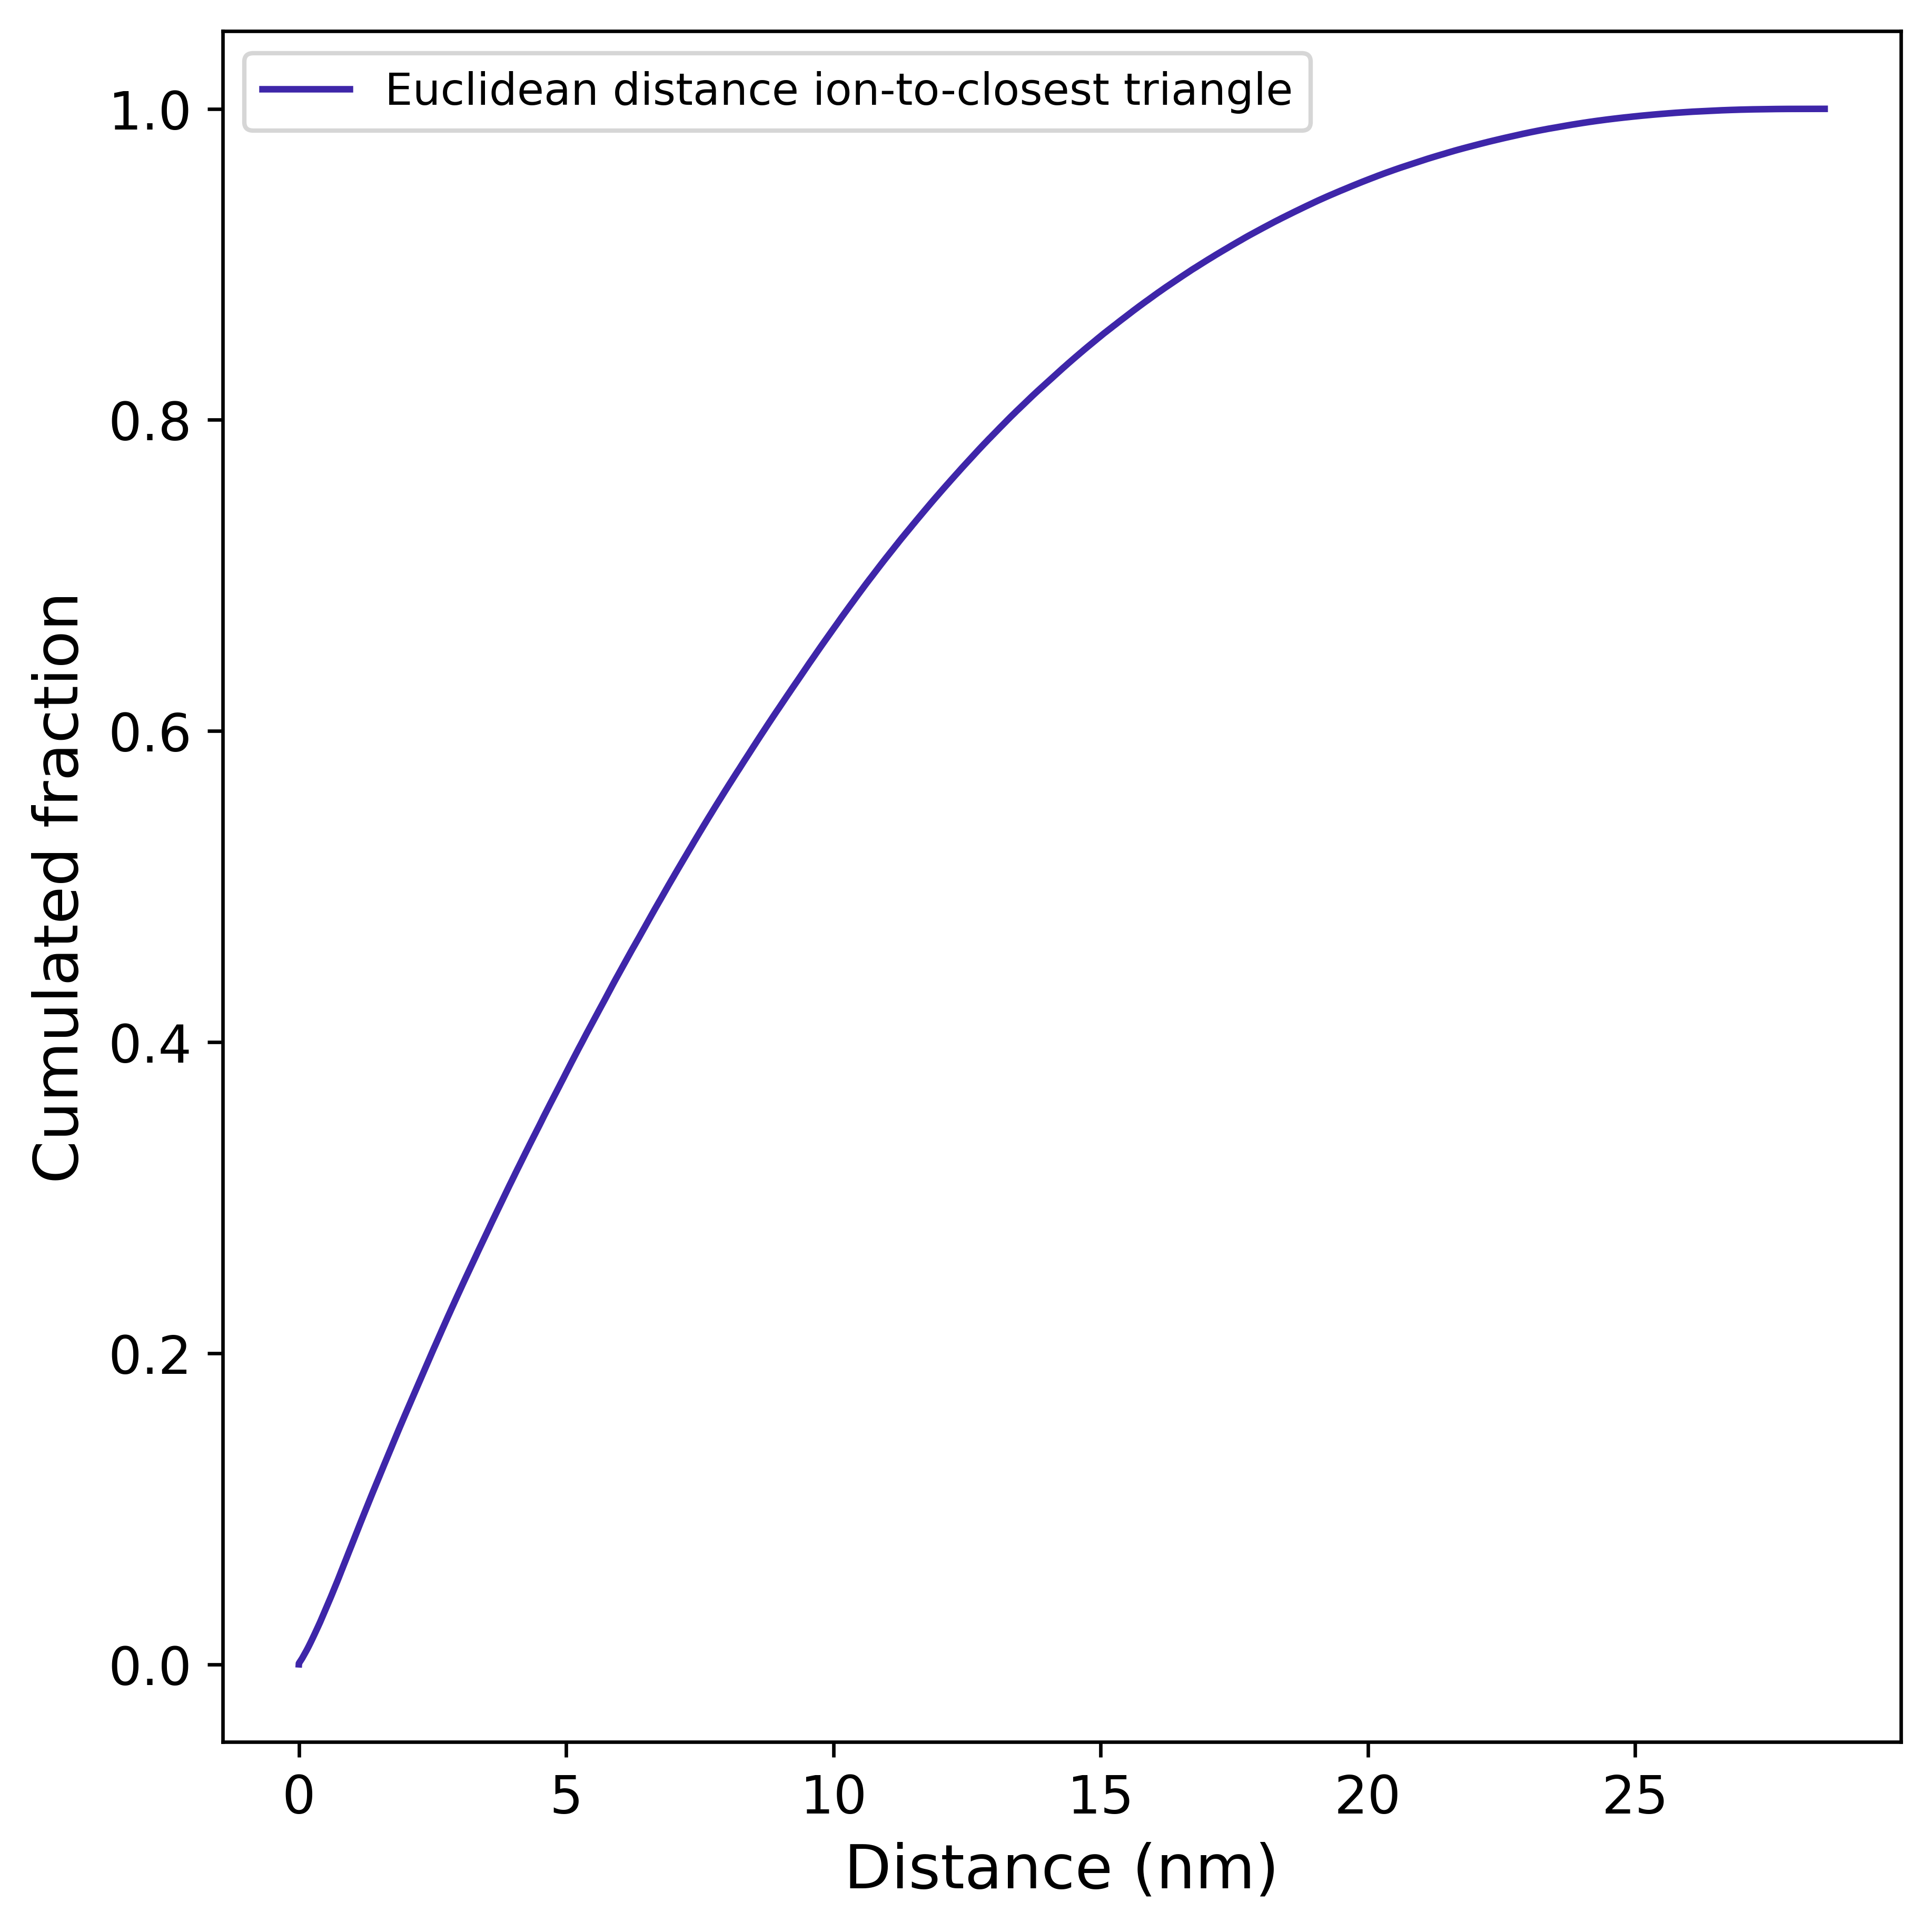

In [26]:
Image(filename=distancer_plot, width=500, height=500)

## Tessellate the ion point cloud.

In [27]:
tessellator = ParmsetupTessellator()
tessellator_config = tessellator.compute_complete_voronoi_tessellation(
    working_directory="../data",
    transcoder_config_sim_id=jobid,
    transcoder_results_sim_id=jobid,
    ranger_results_sim_id=jobid,
    distancer_results_sim_id=jobid,
    tessellator_results_sim_id=jobid)

Using old transcoder/ranger file format, this will become deprecated!
Computing SHA256 hash for file named ../data/PARAPROBE.Transcoder.Results.SimID.636502001.nxs
File ../data/PARAPROBE.Transcoder.Results.SimID.636502001.nxs not accessible !
Computing SHA256 hash for file named ../data/PARAPROBE.Ranger.Results.SimID.636502001.h5
File ../data/PARAPROBE.Ranger.Results.SimID.636502001.h5 not accessible !
Computing SHA256 hash for file named PARAPROBE.Distancer.Results.SimID.636502001.h5
Writing configuration file ...
PARAPROBE.Tessellator.Config.SimID.636502001.nxs was written successfully.


In [28]:
H5Web(tessellator_config)

<jupyterlab_h5web.widget.H5Web object>

In [29]:
! export OMP_NUM_THREADS=4 && mpiexec -n 1 paraprobe_tessellator $jobid $tessellator_config

paraprobe-tessellator
A tool of the FAIRmat atom probe microscopy analytics toolbox for materials scientists
Supporting the community with strong-scaling and open tools for robust and automated uncertainty quantification...

The compiled code of this tool uses the source code with the following GitSha:
0

Paraprobe can be cited via the following papers...
Article
M. K"uhbach and P. Bajaj and A. Breen and E. A. J"agle and B. Gault
On Strong Scaling Open Source Tools for Mining Atom Probe Tomography Data
Microscopy and Microanalysis, 2019, Volume 25, Supplement S2, pp298-299
https://doi.org/10.1017/S1431927619002228


Article
M. K"uhbach and P. Bajaj and H. Zhao and M. H. C"{c}elik E. A. J"agle and B. Gault
On strong-scaling and open-source tools for analyzing atom probe tomography data
npj Computational Materials, 2021, Volume 7, ppArticle number 21
https://doi.org/10.1038/s41524-020-00486-1


Article
M. K"uhbach and A. J. London  and J. Wang and D. K. Schreiber and F. Mendez-Martin and

In [30]:
tessellator_results = f"PARAPROBE.Tessellator.Results.SimID.{jobid}.h5"

In [31]:
H5Web(tessellator_results)

<jupyterlab_h5web.widget.H5Web object>

In [32]:
tessellator_report = AutoReporterTessellator(tessellator_results, jobid)
tessellator_report.get_summary(tessellation_task_id=0)
tessellator_plot = tessellator_report.get_cell_volume_cdf(tessellation_task_id=0)


Unique markers for cells wrt to their wall contact
Markers should be 0 (cell has no) or 187 (cell has contact)
[  0 187 255]
Number of cells in total 4868202
Number of cells with boundary contact 25625
Fraction of unaffected cells 99.47362496461733 %
Statistics without taking edge effects into account
Minimum volume is 0.0 nm^3
Average volume is 0.063489586 nm^3
Maximum volume is 1004.5764 nm^3
Median volume is 0.029423889 nm^3
Statistics with taking edge effects into account
Minimum volume is 0.0 nm^3
Average volume is 0.03559346 nm^3
Maximum volume is 40.656765 nm^3
Median volume is 0.029324653 nm^3
(4868202,)
(4868202,)
Cumulated distribution of cell volume computed
xmi 0.001
xmx 1004.576416015625
ymi 2.0541465062251518e-07
ymx 1.0
Saved PARAPROBE.Tessellator.Results.SimID.636502001.h5.CellsAllVolCDF.png to disk.


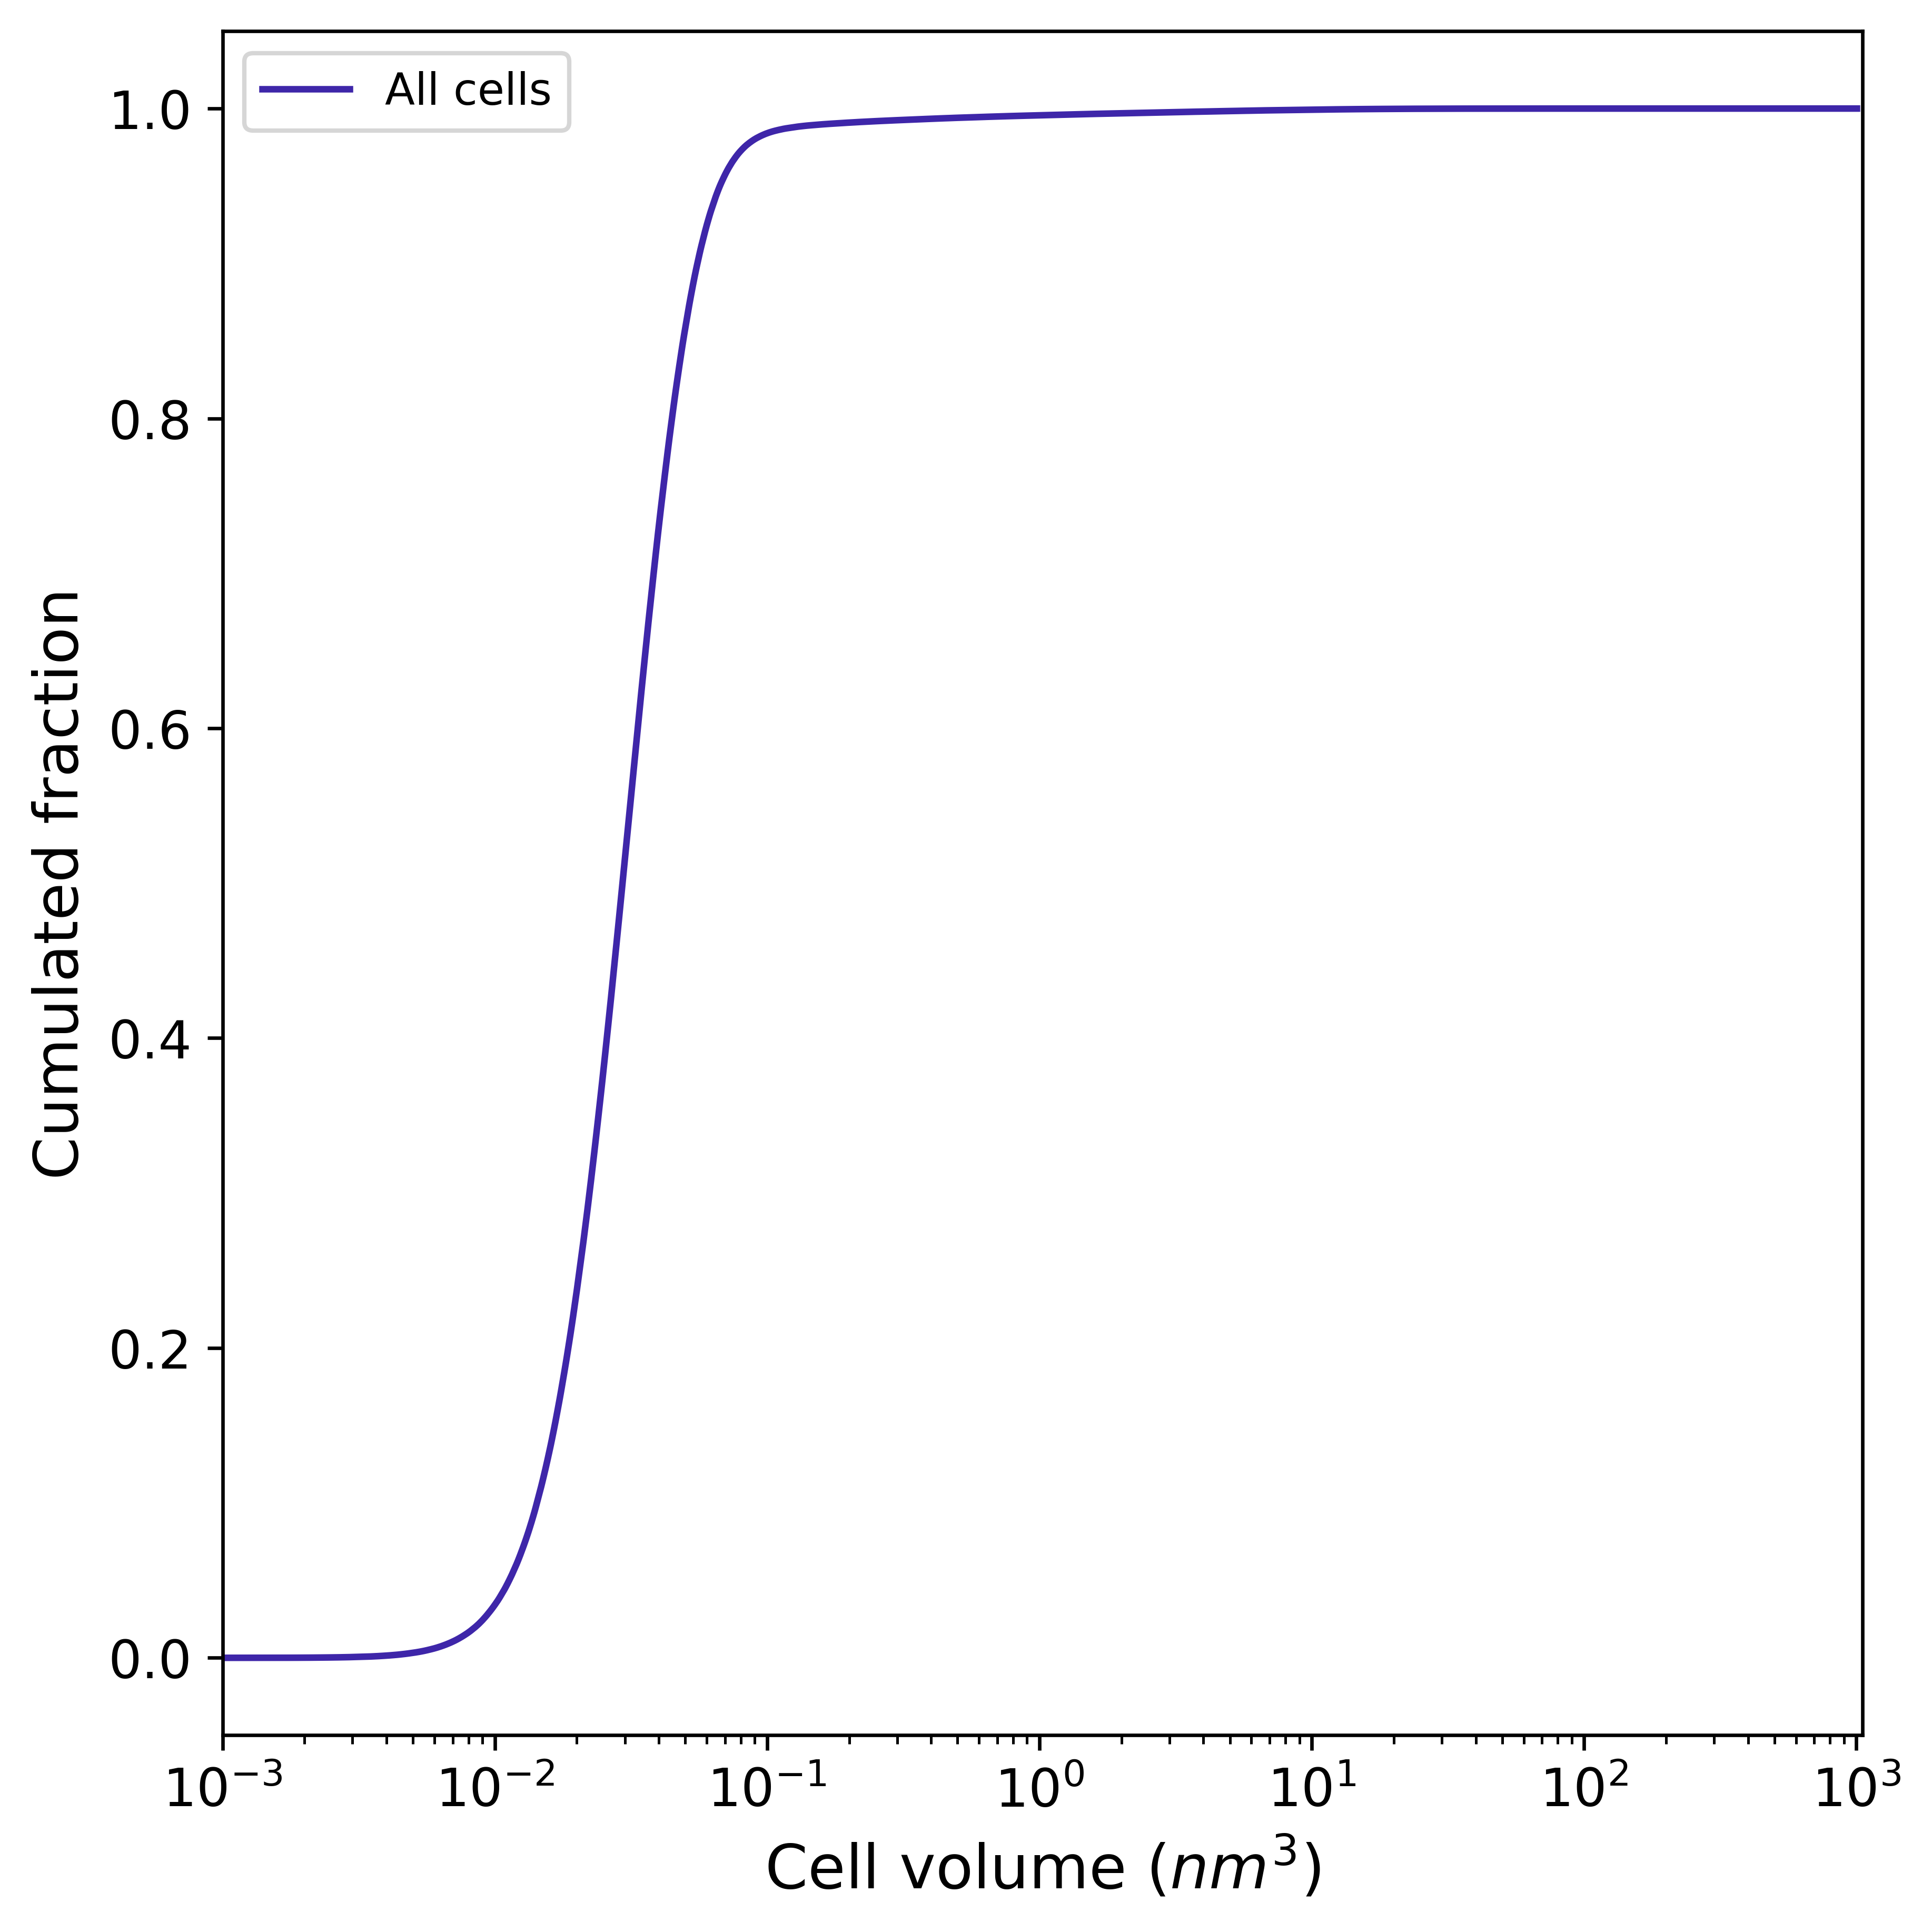

In [33]:
Image(filename=tessellator_plot, width=500, height=500)

## Optionally compute spatial statistics.

In [34]:
spatstat = ParmsetupSpatstat()
task = SpatstatTask()

In [36]:
task.load_reconstruction_and_ranging(
    ranging_applied=True,
    working_directory=".",
    transcoder_config_sim_id=jobid,
    transcoder_results_sim_id=jobid,
    ranger_results_sim_id=jobid)

Using old transcoder/ranger file format, this will become deprecated!
Computing SHA256 hash for file named ./PARAPROBE.Transcoder.Results.SimID.636502001.nxs
Computing SHA256 hash for file named ./PARAPROBE.Ranger.Results.SimID.636502001.h5


In [43]:
task.load_ion_to_edge_distances(
    file_name='PARAPROBE.Distancer.Results.SimID.636502001.h5',
    dataset_name='/entry/process0/point_to_triangle_set/distance')

Computing SHA256 hash for file named PARAPROBE.Distancer.Results.SimID.636502001.h5


In [44]:
task.load_ion_to_feature_distances(
    file_name='PARAPROBE.Distancer.Results.SimID.636502001.h5',
    dataset_name='/entry/process0/point_to_triangle_set/distance')

Computing SHA256 hash for file named PARAPROBE.Distancer.Results.SimID.636502001.h5


In [38]:
task.load_ion_to_edge_distances?

Signature: task.load_ion_to_edge_distances(file_name='', dataset_name='')
Docstring: Specify HDF5 file with precomputed ion-to-edge distances.
File:      ~/miniconda3/envs/apt/lib/python3.9/site-packages/paraprobe_parmsetup/tools/spatstat_guru.py
Type:      method

In [45]:
task.cfg_filter.add_spatial_filter(primitive_list=[RoiRotatedCuboid(center=center, boxdims=[10., 10., 40.])])
task.randomize_ion_types(True)
task.set_random_number_generator()
task.ion_types_source(method='resolve_all')
task.ion_types_target(method='resolve_all')
task.set_knn(kth=1, binwidth=0.01, rmax=2.)
spatstat.add_task(task)
spatstat_configure = spatstat.configure(jobid)

NameError: name 'RoiRotatedCuboid' is not defined

In [ ]:
H5Web(spatstat_config)

In [ ]:
! export OMP_NUM_THREADS=4 && mpiexec -n 1 paraprobe_spatstat $jobid $spatstat_config

In [ ]:
H5Web(spatstat_results)

In [ ]:
spatstat_report = AutoReporterSpatstat(spatstat_results, jobid)
spatstat_report.get_knn(spatstat_task_id=0)

In [ ]:
Image(filename='PARAPROBE.Spatstat.Results.SimID.636502001.nxs.TaskId.0.Knn..Pdf.png', width=500, height=500)

# 2. High-throughput characterization of Y+Ti+O rich objects using iso-composition surfaces
***

We use paraprobe-nanochem, the same tool that can also be used for high-throughput iso-surface based analyses, composition profiling, and iso-surface-based edge modelling.

In [ ]:
what_to_do = 'isosurface_scanning'
nanochem = ParmsetupNanochem()
dataset = NanochemTask()
dataset.load_reconstruction_and_ranging(
    ranging_applied=True,
    working_directory=".",
    transcoder_config_sim_id=jobid,
    transcoder_results_sim_id=jobid,
    ranger_results_sim_id=jobid)
dataset.load_edge_model(
    file_name='PARAPROBE.Surfacer.Results.SimID.636502001.h5',
    dataset_name_vertices='/entry/process0/point_set_wrapping0/alpha_complex/triangle_set/triangles/vertices',
    dataset_name_facet_indices='/entry/process0/point_set_wrapping0/alpha_complex/triangle_set/triangles/faces')    
dataset.load_ion_to_edge_distances(
    file_name='PARAPROBE.Distancer.Results.SimID.63650200.h5',
    dataset_name='/entry/process0/point_to_triangle_set/distance')

task = Delocalization()
task.set_delocalization_input(source='default')
task.set_delocalization_normalization(method='composition')  # ...with grid values normalized to atomic fraction (at.-%)
task.set_delocalization_elements(['Y', 'Ti', 'O'])  # iso-surface defined by Y+Ti+O ...
task.set_delocalization_gridresolutions(length=[1.])  # nm, list of voxel edge length, for each length one analysis
task.set_delocalization_kernel(sigma=[1.0], size=3)  # nm and pixel respectively
# task.set_delocalization_isosurfaces(phi=np.linspace(start=0.04, stop=0.04, num=1, endpoint=True))
task.set_delocalization_isosurfaces(phi=np.linspace(start=0.01, stop=0.21, num=21, endpoint=True)) # isosurface starting at 1 at.-% in steps of 1 at.-% until 21 at.-%
task.set_delocalization_edge_handling(method='default')
task.set_delocalization_edge_threshold(EPSILON)
# nm, with the threshold approaching epsilon only those objects are considered close to the edge which have at least one ion with an ion-to-edge distance almost zero, 
# as these are only the ions virtually on the triangulated surface mesh representing the edge, virtually each object is considered inside
# which quantities to process for the iso-surface
task.report_fields_and_gradients(True)
task.report_triangle_soup(True)
task.report_objects(True)
task.report_objects_properties(True)
task.report_objects_geometry(True)
task.report_objects_optimal_bounding_box(True)
task.report_objects_ions(True)
task.report_objects_edge_contact(True)
# in some cases one may desire to export also doppelganger meshes to those objects which do not represent a closed mesh in the first place
# these doppelganger are the so-called proxy for an object, proxies can be useful to consider objects at the edge of the dataset in
# coprecipitation analyses where otherwise because of the finite size of the dataset and the open mesh of many objects these objects would be discarded
task.report_proxies(False)
task.report_proxies_properties(False)
task.report_proxies_geometry(False)
task.report_proxies_optimal_bounding_box(False)
task.report_proxies_ions(False)

nanochem.add_task(dataset, task)
nanochem_config = nanochem.configure(jobid)

In [ ]:
H5Web(nanochem_config)

In [ ]:
! export OMP_NUM_THREADS=4 && mpiexec -n 1 nanochem_tessellator $jobid $nanochem_config

In [ ]:
nanochem_results = f"PARAPROBE.Nanochem.Results.SimID.{jobid}.h5"

In [ ]:
H5Web(nanochem_results)

In [ ]:
nanochem_report = AutoReporterNanochem(nanochem_results, dataset_id=0)
nanochem_report.get_delocalization(delocalization_task_id=0)

In [ ]:
nanochem_report.get_isosurface_objects_volume_and_number_over_isovalue(delocalization_task_id=0)

In [ ]:
nanochem_plot = 'PARAPROBE.Nanochem.Results.SimID.636502001.nxs.DelocTaskId.0.NumberOverIsoComposition.png'
Image(filename=nanochem_plot, width=500, height=500)

# 3. Spatial correlation analyses
***

In [ ]:
intersector = ParmsetupIntersector()